In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Dropping deck column since 70% and above records are null

In [5]:
df=df.drop('deck',axis=1)

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

Handling missing values

In [7]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [8]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: ylabel='age'>

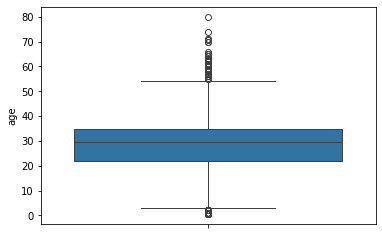

In [10]:
sns.boxplot(df['age'])

<Axes: ylabel='fare'>

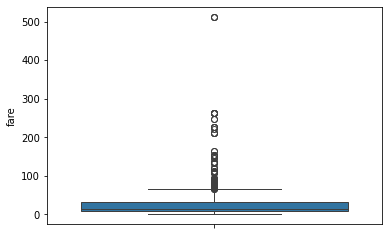

In [11]:
sns.boxplot(df['fare'])

In [12]:
Q1=np.percentile(df['age'],25)
Q3=np.percentile(df['age'],75)
low=Q1-1.5*(Q3-Q1)
high=Q3+1.5*(Q3-Q1)
df=df[(df['age']>low) & (df['age']<high)]

<Axes: ylabel='age'>

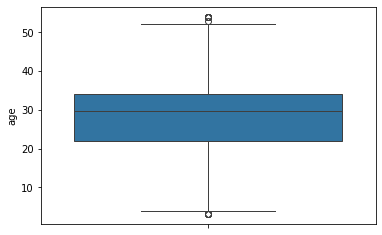

In [13]:
sns.boxplot(df['age'])

Outliers has been reduced

In [14]:
Q1=np.percentile(df['fare'],25)
Q3=np.percentile(df['fare'],75)
low=Q1-1.5*(Q3-Q1)
high=Q3+1.5*(Q3-Q1)
df=df[(df['fare']>low) & (df['fare']<high)]

<Axes: ylabel='fare'>

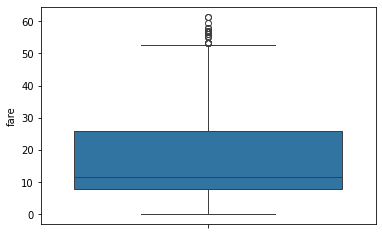

In [15]:
sns.boxplot(df['fare'])

Outliers has been reduced

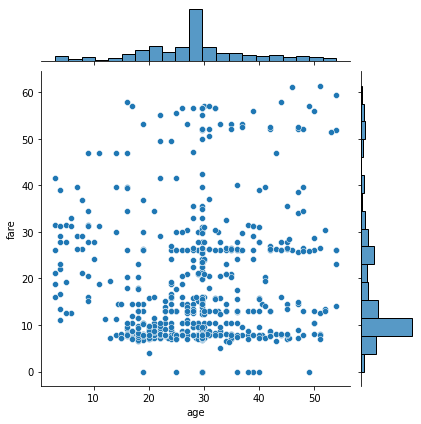

In [16]:
sns.jointplot(x='age',y='fare',data=df)

<Axes: xlabel='survived', ylabel='count'>

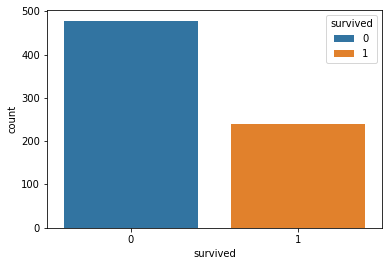

In [17]:
sns.countplot(x='survived',data=df,hue='survived')

0 indicates not survived<br>
1 indicates survived

<Axes: xlabel='sex', ylabel='count'>

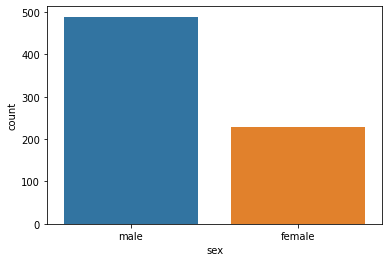

In [18]:
sns.countplot(x='sex',data=df,hue='sex')

In [19]:
sex_count=df['sex'].value_counts()
total=df['sex'].count()
male_percent=(sex_count['male']/total) * 100
female_percent=(sex_count['female']/total) * 100
print('Male Percentage:',male_percent)
print('Female Percentage:',female_percent)

Male Percentage: 68.10584958217271
Female Percentage: 31.894150417827298


<Axes: xlabel='sex', ylabel='age'>

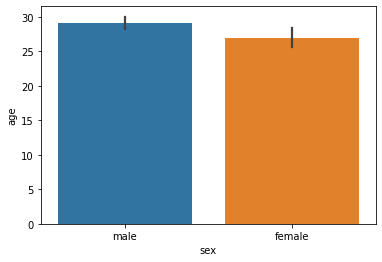

In [20]:
sns.barplot(x='sex',y='age',data=df,hue='sex')

<Axes: xlabel='sex', ylabel='age'>

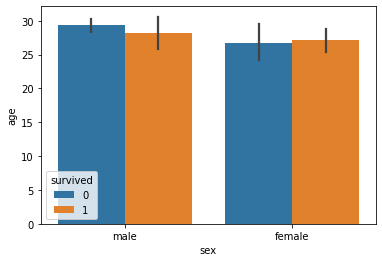

In [21]:
sns.barplot(x='sex',y='age',data=df,hue='survived')

<Axes: xlabel='pclass', ylabel='count'>

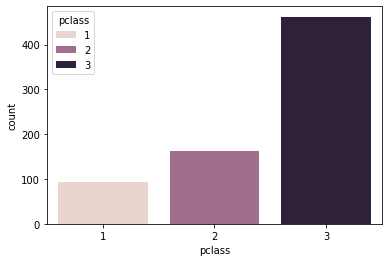

In [22]:
sns.countplot(data=df,x='pclass',hue='pclass')

In [23]:
class_c=df['pclass'].value_counts()
total_c=df['pclass'].count()
c1=(class_c[1]/total) * 100
c2=(class_c[2]/total) * 100
c3=(class_c[3]/total) * 100
print('C1:',c1)
print('C2:',c2)
print('C3:',c3)

C1: 13.09192200557103
C2: 22.56267409470752
C3: 64.34540389972145


<Axes: xlabel='embarked', ylabel='count'>

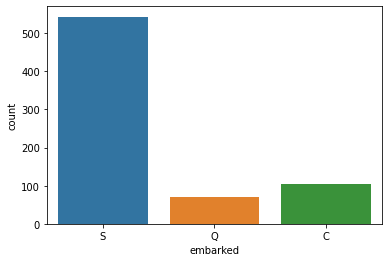

In [24]:
sns.countplot(data=df,x='embarked',hue='embarked')

In [25]:
emb=df['embarked'].value_counts()
total_c=df['embarked'].count()
c1=(emb['S']/total) * 100
c2=(emb['Q']/total) * 100
c3=(emb['C']/total) * 100
print('S:',c1)
print('Q:',c2)
print('C:',c3)

S: 75.6267409470752
Q: 9.88857938718663
C: 14.484679665738161


<Axes: xlabel='pclass', ylabel='survived'>

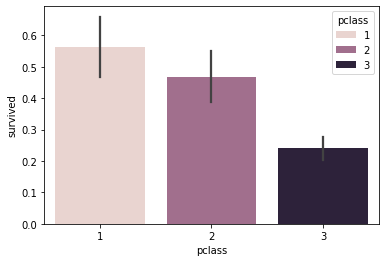

In [26]:
sns.barplot(x='pclass',y='survived',data=df,hue='pclass')